# Import packages

In [ ]:
# # if using google drive
# %cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

In [ ]:
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

%load_ext autoreload
%autoreload 2


from data_wrangling import specific_utils, combine_info_utils, general_utils, further_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_collect_info_class, GUAT_collect_info_helper_class, GUAT_combine_info_class
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_class, GUAT_vs_TAFT_x_sessions_class, helper_GUAT_vs_TAFT_class
from visualization.matplotlib_tools import plot_trials, plot_behaviors_utils
from visualization.animation import animation_class
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from visualization.plotly_polar_tools import plotly_utils_polar, plotly_for_ff_polar, plotly_for_trajectory_polar
from machine_learning.ml_methods import ml_methods_class
from machine_learning.ml_methods.advanced_ml_methods import advanced_regression_utils, advanced_classification_utils, reg_feat_importance

import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os.path import exists
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import gc
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
import os, sys, sys
from importlib import reload
from sklearn.exceptions import ConvergenceWarning


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 50



Set up logging configuration.
Numba isn't available, making a no-op decorator


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


# Run overnight

In [ ]:
# # Predict TAFT vs GUAT
# for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
#     cgts = GUAT_vs_TAFT_x_sessions_class.GUATandTAFTacrossSessionsClass()
#     combd_GUAT_x_df, combd_TAFT_x_df = cgts.streamline_getting_combd_GUAT_or_TAFT_x_df(monkey_name=monkey_name)

# data across sessions

In [77]:
monkey_name = 'monkey_Schro'
cgts = GUAT_vs_TAFT_x_sessions_class.GUATandTAFTacrossSessionsClass()
cgts.streamline_getting_combd_decision_making_basic_ff_info(monkey_name=monkey_name, exists_ok=True)
decision_making_basic_ff_info_cleaned = general_utils.drop_rows_with_any_na(cgts.combd_decision_making_basic_ff_info)

data_0316
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0316/ff_dataframe.h5
before calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 7
after calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 7
data_0321
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0321/ff_dataframe.h5
before calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 3
after calling deal_with_duplicated_stop_point_index, len(GUAT_w_ff_df) 3
data_0322
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caug

# data for one session

In [78]:
# exists_ok = True
# cgt = GUAT_vs_TAFT_class.GUATvsTAFTclass(ref_point_mode='time', 
#                                             raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
#                                             ref_point_value=-1.5,)
# cgt.make_decision_making_basic_ff_info()
# decision_making_basic_ff_info_cleaned = cgt.decision_making_basic_ff_info_cleaned.copy()

# exp

In [79]:
def _add_nxt_ff_index(self):
    if self.GUAT_or_TAFT == 'TAFT':
        self.stops_near_ff_df['nxt_ff_index'] = self.stops_near_ff_df['cur_ff_index'] + 1
    else:
        self.stops_near_ff_df['nxt_ff_index'] = np.searchsorted(
            self.ff_caught_T_new, self.stops_near_ff_df['stop_time'].values)

        # check if the nxt_ff_index is correct (can delete the lines below later)
        self.stops_near_ff_df['nxt_ff_caught_time'] = self.ff_caught_T_new[self.stops_near_ff_df['nxt_ff_index'].values]
        # see if any element of self.stops_near_ff_df['nxt_ff_caught_time'] - self.stops_near_ff_df['stop_time'] is smaller than 0
        # if there is, then the nxt_ff_index is not correct
        if np.any(self.stops_near_ff_df['nxt_ff_caught_time'] - self.stops_near_ff_df['stop_time'] < 0):
            raise ValueError('nxt_ff_index is not correct')

In [80]:
# this can add last-seen and current info:
def process_trials_df(trials_df, monkey_information, ff_dataframe, ff_real_position_sorted, stop_period_duration):


# for last-seen info
    ff_first_and_last_seen_info = nxt_ff_utils.get_ff_first_and_last_seen_info(processed_df['ff_index'].values,
                                                                               processed_df['stop_point_index'].values,
                                                                               processed_df['beginning_time'],
                                                                               processed_df['stop_time'],
                                                                               ff_dataframe_visible,
                                                                               monkey_information)


# for current info
    ff_info = decision_making_utils.find_many_ff_info_anew(
        processed_df['ff_index'].values, processed_df['stop_point_index'].values,
        ff_real_position_sorted, ff_dataframe_visible, monkey_information)

In [81]:
cgt.TAFT_df.columns

NameError: name 'cgt' is not defined

In [ ]:
cgt.TAFT_df2.columns

Index(['ff_index', 'ref_point_index', 'ff_x', 'ff_y', 'monkey_x', 'monkey_y',
       'monkey_angle', 'ff_distance', 'ff_angle', 'ff_angle_boundary',
       'stop_point_index', 'ref_time', 'stop_time', 'beginning_time'],
      dtype='object')

In [ ]:
cgt.GUAT_trials_df

,stop_cluster_id,trial,num_stops,stop_indices,cluster_index,first_stop_point_index,second_stop_point_index,last_stop_point_index,first_stop_time,second_stop_time,last_stop_time
0,17,6,3,"[2766, 2802, 2843]",0,2766,2802,2843,45.80686,46.40443,47.08501
5,85,70,3,"[11172, 11210, 11257]",5,11172,11210,11257,183.55107,184.18187,184.96171
6,86,70,4,"[11428, 11465, 11504, 11544]",6,11428,11465,11544,187.80060,188.41481,189.72596
7,93,78,2,"[12788, 12824]",7,12788,12824,12824,210.17707,210.77454,210.77454
8,94,78,2,"[12894, 12931]",8,12894,12931,12931,211.93651,212.55053,212.55053
...,...,...,...,...,...,...,...,...,...,...,...
201,1606,1278,2,"[208087, 208127]",201,208087,208127,208127,3417.99997,3418.66397,3418.66397
203,1618,1286,2,"[210331, 210373]",203,210331,210373,210373,3455.05050,3455.74772,3455.74772
204,1631,1299,2,"[212140, 212181]",204,212140,212181,212181,3484.86351,3485.54438,3485.54438
205,1643,1309,2,"[214294, 214336]",205,214294,214336,214336,3520.36984,3521.06673,3521.06673


In [ ]:
cgt.decision_making_basic_ff_info['whether_switched'].value_counts()

In [ ]:
decision_making_basic_ff_info_cleaned['whether_switched'].value_counts()

In [ ]:
decision_making_basic_ff_info_cleaned.columns

Index(['stop_point_index', 'ff_index', 'stop_time', 'stop_cum_distance',
       'beginning_time', 'point_index_ff_first_seen',
       'point_index_ff_last_seen', 'monkey_angle_ff_first_seen',
       'monkey_angle_ff_last_seen', 'ff_distance_ff_first_seen',
       'ff_distance_ff_last_seen', 'ff_angle_ff_first_seen',
       'ff_angle_ff_last_seen', 'ff_angle_boundary_ff_first_seen',
       'ff_angle_boundary_ff_last_seen', 'time_ff_first_seen',
       'time_ff_last_seen', 'time_since_ff_first_seen',
       'time_since_ff_last_seen', 'ff_distance', 'ff_angle',
       'ff_angle_boundary', 'time_since_last_vis', 'whether_switched'],
      dtype='object')

In [ ]:
cgt.GUAT_w_ff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   stop_cluster_id                142 non-null    Int64  
 1   trial                          142 non-null    int64  
 2   num_stops                      142 non-null    int64  
 3   stop_indices                   142 non-null    object 
 4   cluster_index                  142 non-null    int64  
 5   first_stop_point_index         142 non-null    int64  
 6   second_stop_point_index        142 non-null    int64  
 7   last_stop_point_index          142 non-null    int64  
 8   first_stop_time                142 non-null    float64
 9   second_stop_time               142 non-null    float64
 10  last_stop_time                 142 non-null    float64
 11  nearby_alive_ff_indices        142 non-null    object 
 12  latest_visible_ff              142 non-null    int

In [ ]:
gcc.miss_abort_cur_ff_info

,num_stops,ff_distance,ff_angle,abs_ff_angle,ff_angle_boundary,abs_ff_angle_boundary,time_since_last_vis,time_till_next_visible,duration_of_last_vis_period,point_index,...,distance_from_monkey_now_to_ff_when_ff_next_seen,angle_from_monkey_now_to_ff_when_ff_next_seen,curv_diff_from_monkey_now_to_ff_when_ff_last_seen,curv_diff_from_monkey_now_to_ff_when_ff_next_seen,curv_of_traj,curvature_lower_bound,curvature_upper_bound,opt_arc_curv,curv_diff,abs_curv_diff
0,1,27.31926,2.03699,2.03699,1.66224,1.66224,0.31538,5.00000,0.29881,1535,...,27.31926,2.03699,NaN,NaN,0.00898,0.00000,200.00000,0.02000,0.01102,0.01102
1,1,35.92945,0.06040,0.06040,0.00000,0.00000,0.86321,5.00000,0.29369,1877,...,35.92945,0.06040,0.00380,0.00380,-0.00380,0.00000,0.01946,0.00000,0.00380,0.00380
2,1,57.10949,0.22121,0.22121,0.04520,0.04520,1.19516,5.00000,0.28219,2684,...,57.10949,0.22121,0.00781,0.00781,-0.00620,0.00161,0.01376,0.00161,0.00781,0.00781
3,3,70.88994,-0.63818,0.63818,-0.49664,0.49664,0.76391,5.00000,0.28210,2759,...,70.88994,-0.63818,-0.02081,-0.02081,0.00723,-0.02000,-0.01358,-0.01358,-0.02081,0.02081
4,1,45.16038,-0.08034,0.08034,-0.00000,0.00000,1.01259,5.00000,0.28203,8202,...,45.16038,-0.08034,-0.00046,-0.00046,0.00046,-0.01358,0.00000,-0.00000,-0.00046,0.00046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1,25.64688,2.83932,2.83932,2.43878,2.43878,2.20739,5.00000,0.28214,215972,...,1000.00000,0.00000,NaN,NaN,-0.00025,0.00000,200.00000,0.02000,0.02025,0.02025
291,1,41.95372,-0.79724,0.79724,-0.55656,0.55656,1.01261,5.00000,0.28219,216319,...,1000.00000,0.00000,NaN,NaN,0.00637,-200.00000,0.00000,-0.02000,-0.02637,0.02637
292,1,35.39604,-2.46471,2.46471,-2.17829,2.17829,0.94608,5.00000,0.28222,217923,...,35.39604,-2.46471,NaN,NaN,-0.00555,-200.00000,0.00000,-0.02000,-0.01445,0.01445
293,1,34.80611,-0.27552,0.27552,-0.00000,0.00000,2.17433,5.00000,0.28246,218558,...,1000.00000,0.00000,-0.00030,-0.00030,0.00030,-0.02000,0.00000,-0.00000,-0.00030,0.00030


In [ ]:
# currently.....P


gc_kwargs = {'num_old_ff_per_row': 2,  # originally it was 2
             'num_new_ff_per_row': 2,  # originally it was 2
             }

In [ ]:
# this is potentially useful in shifting ff around (from nxt info to cur info):
process_current_and_alternative_ff_info

# but also specificaly want next captured ff info....?

# SELECT features

In [82]:
decision_making_basic_ff_info_cleaned.columns

Index(['stop_point_index', 'ff_index', 'stop_time', 'stop_cum_distance',
       'beginning_time', 'point_index_ff_first_seen',
       'point_index_ff_last_seen', 'monkey_angle_ff_first_seen',
       'monkey_angle_ff_last_seen', 'ff_distance_ff_first_seen',
       'ff_distance_ff_last_seen', 'ff_angle_ff_first_seen',
       'ff_angle_ff_last_seen', 'ff_angle_boundary_ff_first_seen',
       'ff_angle_boundary_ff_last_seen', 'time_ff_first_seen',
       'time_ff_last_seen', 'time_since_ff_first_seen',
       'time_since_ff_last_seen', 'ff_distance', 'ff_angle',
       'ff_angle_boundary', 'time_since_last_vis', 'whether_switched',
       'data_name'],
      dtype='object')

In [83]:
attributes = ['ff_distance_ff_last_seen',
            'ff_angle_ff_last_seen',
            'ff_angle_boundary_ff_last_seen',
            'time_since_ff_last_seen']

In [84]:
#attributes = ['ff_distance', 'ff_angle','ff_angle_boundary', 'time_since_last_vis']
'''
不能用ff_distance, 因为毕竟reference point是point on the trajectory closest to the stop. 
用distance to ff 的话, 很大程度上暴露了到底是不是TAFT (虽说不是百分百暴露）
'''

'\n不能用ff_distance, 因为毕竟reference point是point on the trajectory closest to the stop. \n用distance to ff 的话, 很大程度上暴露了到底是不是TAFT (虽说不是百分百暴露）\n'

### run

In [85]:
x_var_df = decision_making_basic_ff_info_cleaned[attributes]
y_var_df = decision_making_basic_ff_info_cleaned[['whether_switched']].copy()

ml_inst = ml_methods_class.MlMethods(x_var_df=x_var_df,
                                     y_var_df=y_var_df)

In [86]:
ml_inst.use_ml_model_for_classification(ml_inst.x_var_df, ml_inst.y_var_df)

Number of outliers dropped before train_test_split: 0 out of 2147 samples.
Model: gnb
Model: logreg
Model: ridge
Model: sgd
Model: dt
Model: bagging
Model: rf
Model: extra_trees
Model: boosting
Model: grad_boosting
Model: knn
Model: mlp
Model: xgb


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:42:36] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: lgbm
[LightGBM] [Info] Number of positive: 508, number of negative: 1209
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1717, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295865 -> initscore=-0.867067
[LightGBM] [Info] Start training from score -0.867067
Model: catboost
Model: svm

Model comparison:
             model  accuracy  balanced_accuracy  precision_macro  recall_macro  \
0        catboost   0.83721            0.78268          0.83167       0.78268   
1   grad_boosting   0.83256            0.78117          0.82188       0.78117   
2              rf   0.83023            0.76990          0.82730       0.76990   
3             mlp   0.82791            0.79876          0.80352       0.79876   
4            lgbm   0.82558            0.77412 

In [87]:
import statsmodels.api as sm

X2 = sm.add_constant(ml_inst.x_var_df)  # add intercept
logit_model = sm.Logit(ml_inst.y_var_df, X2)  # logistic regression
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.569842
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       whether_switched   No. Observations:                 2147
Model:                          Logit   Df Residuals:                     2142
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.06830
Time:                        22:42:41   Log-Likelihood:                -1223.4
converged:                       True   LL-Null:                       -1313.1
Covariance Type:            nonrobust   LLR p-value:                 1.021e-37
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9460      0.083    -11.450     

# model's feature selection

In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(ml_inst.x_var_df, ml_inst.y_var_df)
important = model.coef_[0] != 0
X_new = ml_inst.x_var_df.loc[:, important]
X_new.columns


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['ff_distance_ff_last_seen', 'ff_angle_ff_last_seen',
       'ff_angle_boundary_ff_last_seen', 'time_since_ff_last_seen'],
      dtype='object')

In [89]:
## Hmmm I don't think this is needed at the moment

# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# sfs = SequentialFeatureSelector(model, n_features_to_select=min(10, len(ml_inst.x_var_df.columns)-1), direction="forward")
# X_new = sfs.fit_transform(ml_inst.x_var_df, ml_inst.y_var_df.values.ravel())


In [90]:

# # Boolean mask of selected features
# mask = sfs.get_support()

# # Names of selected features
# selected_features = ml_inst.x_var_df.columns[mask]

# print("Selected features:")
# print(selected_features)

## statsmodels, logreg

In [91]:
import statsmodels.api as sm

X2 = sm.add_constant(ml_inst.x_var_df)  # add intercept
logit_model = sm.Logit(ml_inst.y_var_df, X2)  # logistic regression
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.569842
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       whether_switched   No. Observations:                 2147
Model:                          Logit   Df Residuals:                     2142
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.06830
Time:                        22:42:41   Log-Likelihood:                -1223.4
converged:                       True   LL-Null:                       -1313.1
Covariance Type:            nonrobust   LLR p-value:                 1.021e-37
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9460      0.083    -11.450     

## random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(ml_inst.x_var_df, ml_inst.y_var_df)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "feature": ml_inst.x_var_df.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance)


/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                          feature  importance
2  ff_angle_boundary_ff_last_seen     0.29092
3         time_since_ff_last_seen     0.24852
0        ff_distance_ff_last_seen     0.24608
1           ff_angle_ff_last_seen     0.21448


## grad_boosting (so that we can see feature importance)

In [93]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


# Define the model
model = GradientBoostingClassifier(
    learning_rate=0.05, max_depth=7, max_features='sqrt',
    min_samples_leaf=2, min_samples_split=7,
    n_estimators=500, subsample=0.5
)


# Fit the model
model.fit(ml_inst.x_var_df, ml_inst.y_var_df)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': ml_inst.x_var_df.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

# Determine significant features (e.g., importance > 0.01)
significant_features = feature_importances_df[feature_importances_df['Importance'] > 0.01]
print("Significant features:")
print(significant_features)

/home/cicid/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Significant features:
                          Feature  Importance
0        ff_distance_ff_last_seen     0.26940
2  ff_angle_boundary_ff_last_seen     0.25260
3         time_since_ff_last_seen     0.25093
1           ff_angle_ff_last_seen     0.22707


# Advanced classification

In [ ]:
tune = False

ml_inst.use_train_test_split(ml_inst.x_var_df, ml_inst.y_var_df)
model, y_pred, model_comparison_df = advanced_classification_utils.use_advanced_model_for_classification(
    ml_inst.X_train, ml_inst.y_train, ml_inst.X_test, ml_inst.y_test,
    kfold_cv=5,
    tune=tune,                # turn tuning on/off
    n_iter=30,                # ~3k samples sweet spot
    tune_scoring="balanced_accuracy",
    checkpoint_dir=f"all_monkey_data/decision_making/{cgts.monkey_name}/pred_num_stops/cls_runs",   # folder to save progress
    resume=False,              # skip finished models on rerun
    n_jobs=-1,
    verbose=True
)

Number of outliers dropped before train_test_split: 0 out of 2147 samples.

=== Model: gnb ===
Test accuracy: 0.7860 | balanced_acc: 0.6682

=== Model: logreg ===
Test accuracy: 0.7512 | balanced_acc: 0.6023

=== Model: ridge ===
Test accuracy: 0.7395 | balanced_acc: 0.5811

=== Model: sgd ===
Test accuracy: 0.6535 | balanced_acc: 0.5557

=== Model: dt ===
Test accuracy: 0.7767 | balanced_acc: 0.7494

=== Model: bagging ===


Test accuracy: 0.8372 | balanced_acc: 0.7757

=== Model: rf ===
Test accuracy: 0.8395 | balanced_acc: 0.7860

=== Model: extra_trees ===
Test accuracy: 0.8488 | balanced_acc: 0.8034

=== Model: boosting ===
Test accuracy: 0.8233 | balanced_acc: 0.7249

=== Model: grad_boosting ===
Test accuracy: 0.8395 | balanced_acc: 0.7860

=== Model: knn ===
Test accuracy: 0.8395 | balanced_acc: 0.7774

=== Model: mlp ===
Test accuracy: 0.8535 | balanced_acc: 0.7896

=== Model: xgb ===
Test accuracy: 0.8256 | balanced_acc: 0.7738

=== Model: lgbm ===
[LightGBM] [Info] Number of positive: 515, number of negative: 1202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1717, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299942 -> initscore=-0.847575
[LightGBM] [Info] Star

# In the future

In [95]:
# btw, what's the reference point ??? (like at which point are we predicting TAFT vs GUAT?)

In [96]:
 # what might be interesting to add from TAFT_x_df:
 
 'angle_from_stop_to_nxt_ff',
 'angle_from_cur_ff_to_nxt_ff',
 
 
 # monkey's own curvature info?
 # so like find curv of traj based on [-25, 0] or something,
 
 
 # rather than ff last seen, what about at ref?
 # (btw, I'm not gonna use exactly the below...will tweak it)
 'cur_ff_angle_diff_boundary_at_ref',
 'cur_ff_flash_duration_at_ref',
 'cur_ff_earliest_flash_rel_time_at_ref',
 'cur_ff_latest_flash_rel_time_at_ref',
 
 
 # and also all the eye-related features

('cur_ff_latest_flash_rel_time_at_ref',)

# Compare distributions of features

## basic features

In [97]:
attributes = ['ff_distance_ff_last_seen', 
            'time_since_ff_last_seen',
            'ff_angle_ff_last_seen', 
            'ff_angle_boundary_ff_last_seen',
            ]

In [98]:
attributes = ['ff_distance', 'ff_angle', 'ff_angle_boundary', 'time_since_last_vis']

In [99]:
import seaborn as sns

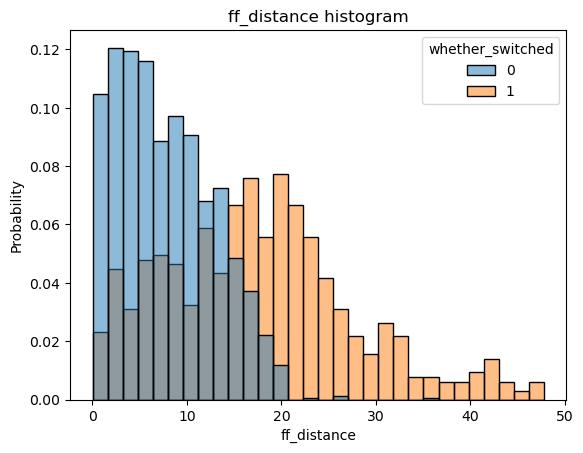

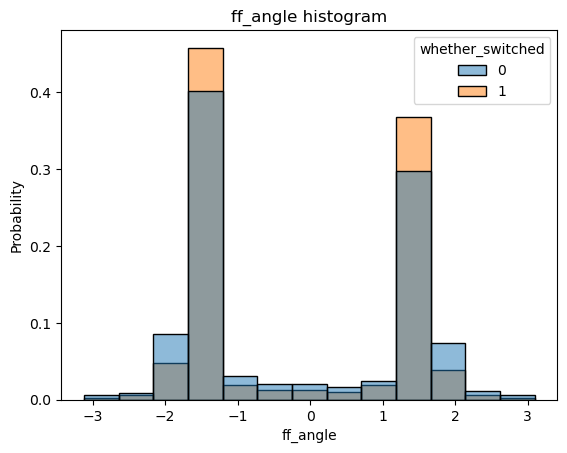

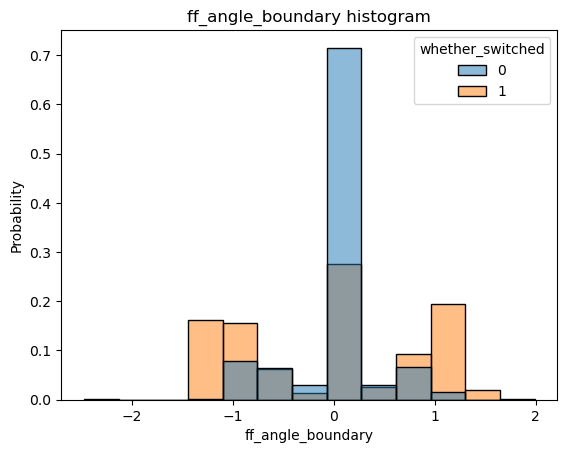

In [100]:
# for each feature in significant_features, plot the histogram of the feature for each class
for feature in attributes:
    sns.histplot(x=feature, data=decision_making_basic_ff_info_cleaned, stat='probability', kde=False, hue='whether_switched', common_norm=False)
    plt.title(f'{feature} histogram')
    plt.show()

## complex features

In [101]:
TAFT = cgt.TAFT_x_df.copy()
TAFT['whether_TAFT'] = 1
GUAT = cgt.GUAT_x_df.copy()
GUAT['whether_TAFT'] = 0
both_df = pd.concat([TAFT, GUAT], axis=0)

NameError: name 'cgt' is not defined

In [ ]:
# for each feature in significant_features, plot the histogram of the feature for each class
for feature in ['cur_ff_distance_at_ref', 'cur_ff_angle_at_ref']:
    sns.histplot(x=feature, data=both_df, stat='probability', kde=False, hue='whether_TAFT', common_norm=False)
    plt.title(f'{feature} histogram')
    plt.show()

In [ ]:
# for each feature in significant_features, plot the histogram of the feature for each class
max_features_to_plot = 3
count = 0
for feature in significant_features['Feature']:
    sns.histplot(x=feature, data=both_df, stat='probability', kde=False, hue='whether_TAFT', common_norm=False)
    plt.title(f'{feature} histogram')
    plt.show()
    count += 1
    if count >= max_features_to_plot:
        break

# check vif

In [ ]:
# # can skip this if only wanting ML results
# pd.set_option('display.max_rows', 100)
# ml_inst.use_vif(ml_inst.x_var_df)
# features_w_big_vif = ml_inst.vif_df[ml_inst.vif_df['vif'] > 100].feature.values
# #ml_inst.x_var_df = ml_inst.x_var_df.drop(columns=features_w_big_vif)
# ml_inst.vif_df.head(20)


In [ ]:
# specific_columns = ml_inst.vif_df[ml_inst.vif_df["VIF"] > 2000].feature.values
# ml_inst.show_correlation_heatmap(specific_columns=specific_columns)
# ml_inst.show_correlation_heatmap()

# cProfile

In [ ]:
# # test and see what is taking so long in running a function
# import cProfile

# cProfile.run("cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='GUAT', exists_ok=False)", sort='cumtime')

# #ncalls  tottime  percall  cumtime  percall